In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline

mpl.style.use('ggplot')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.10.1


In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')


In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
# print the dimensions of the dataframe
print(f'Dimension of dataframe : {df_can.shape}')

Dimension of dataframe : (195, 39)


In [5]:
# set the country names as a index useful for quickly looking up
df_can.set_index('Country', inplace=True)
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [6]:
# create list of years from 1980 - 2013
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [7]:
df_can.sort_values(['Total'], inplace=True, ascending=False, axis=0)
df_top5 = df_can.head(5)

df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0.5, 0, 'Years')

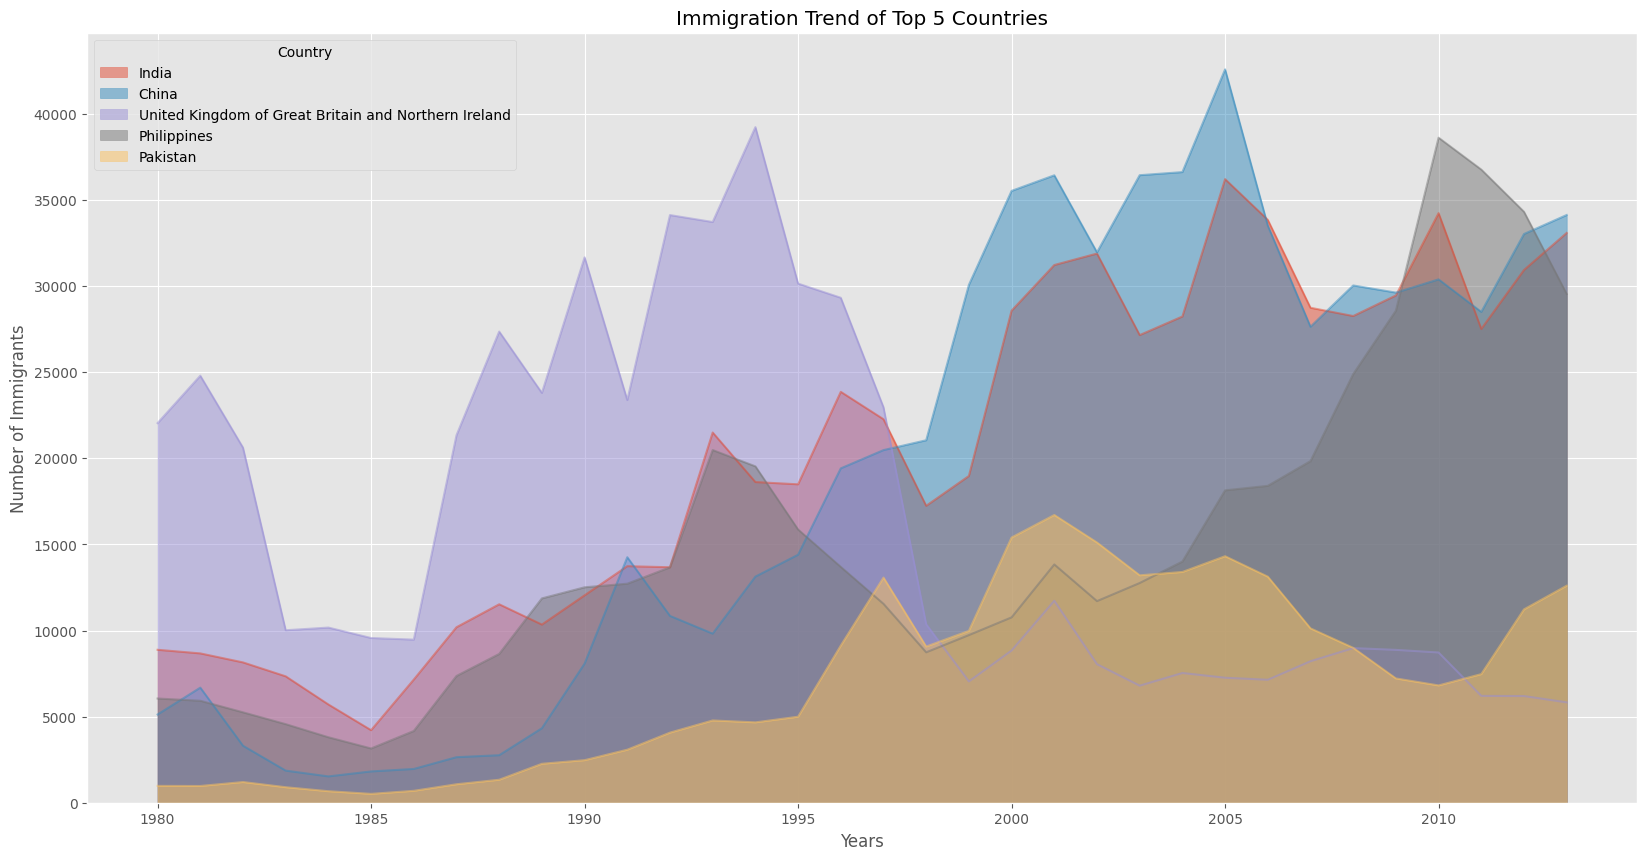

In [8]:
df_top5.index = df_top5.index.map(int)

df_top5.plot( kind='area', stacked=False, figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

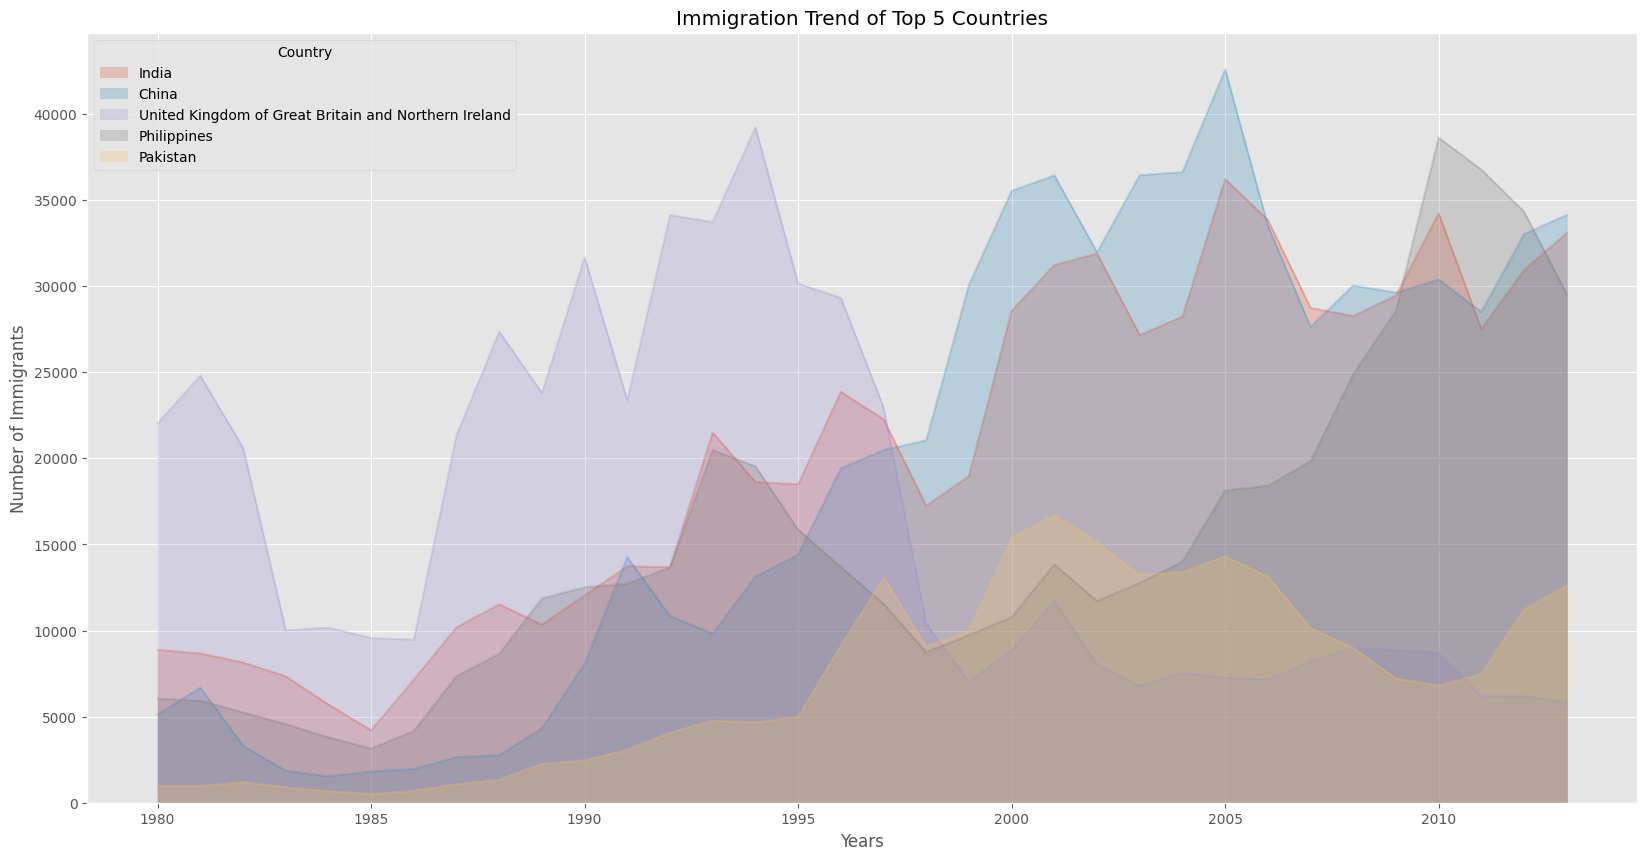

In [9]:
# use alpha parameter to modifiy transparency plot
df_top5.index = df_top5.index.map(int)

df_top5.plot( kind='area', stacked=False, alpha=0.25, figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

Text(0, 0.5, 'Number of Immigrants')

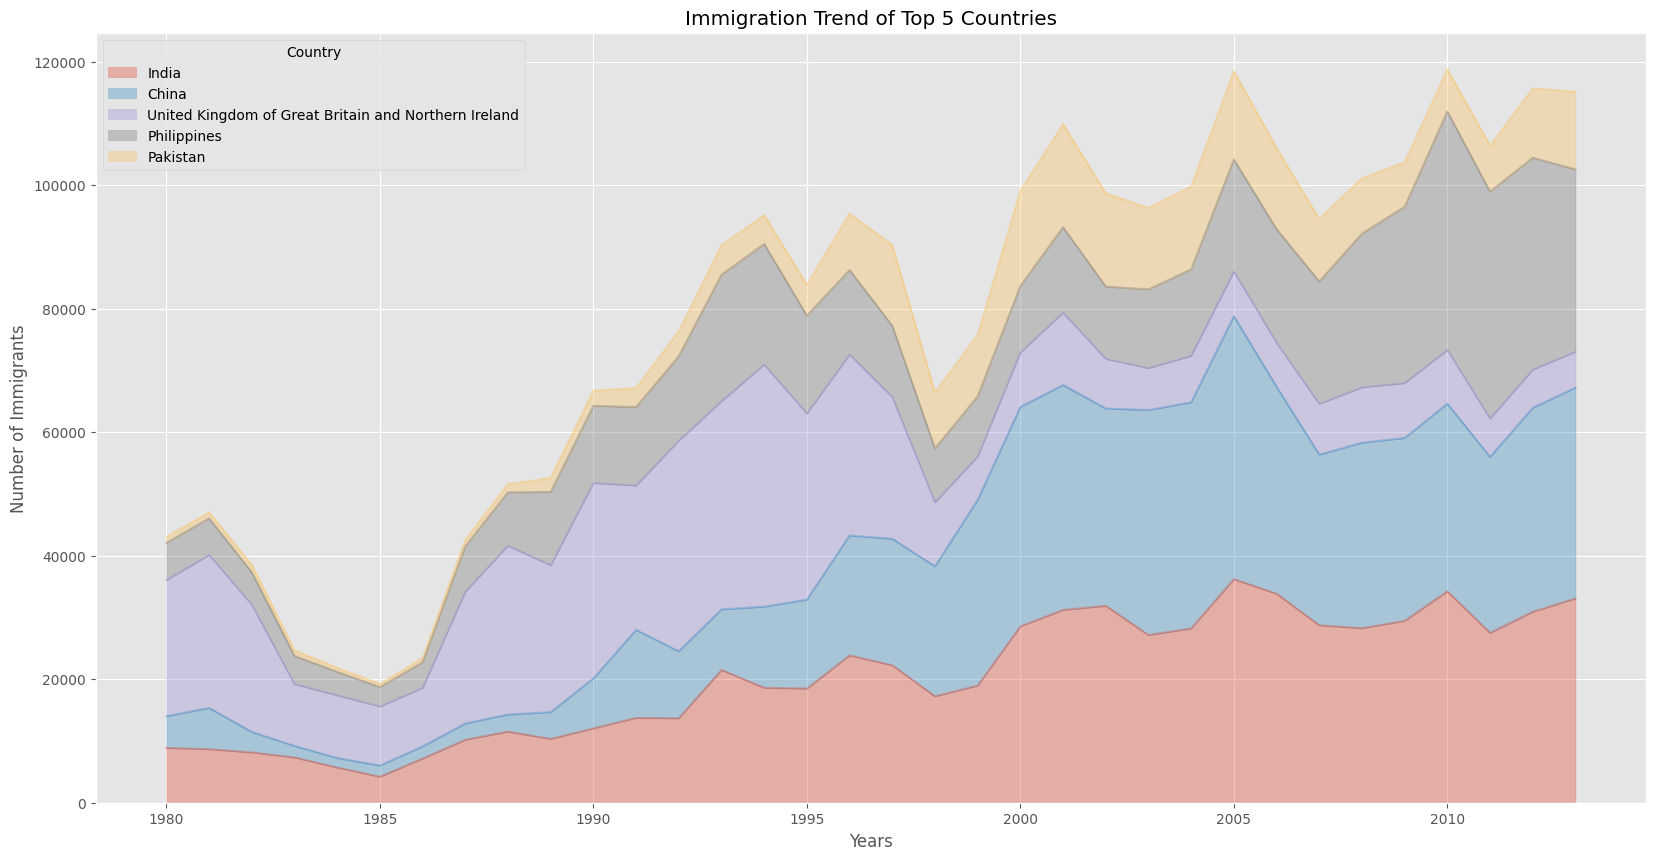

In [10]:
# Artist layer - (Axes)

ax = df_top5.plot( kind='area', alpha= 0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')


Text(0, 0.5, 'Number of Immigrants')

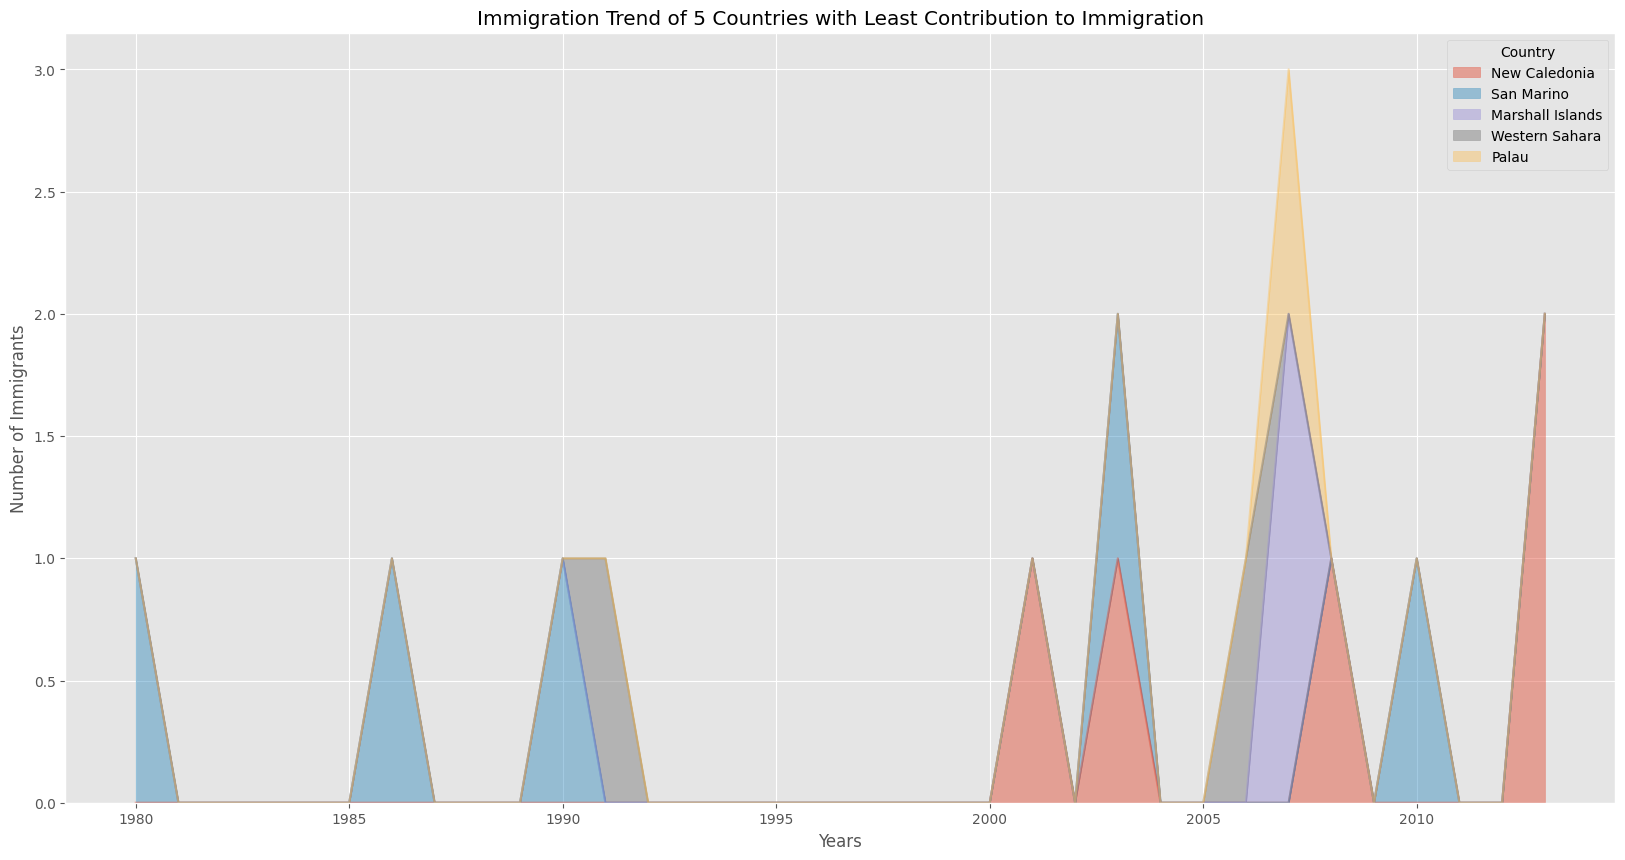

In [11]:
# using scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()
df_least5.head()
df_least5.index = df_least5.index.map(int)

df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

Text(0, 0.5, 'Number of Immigrants')

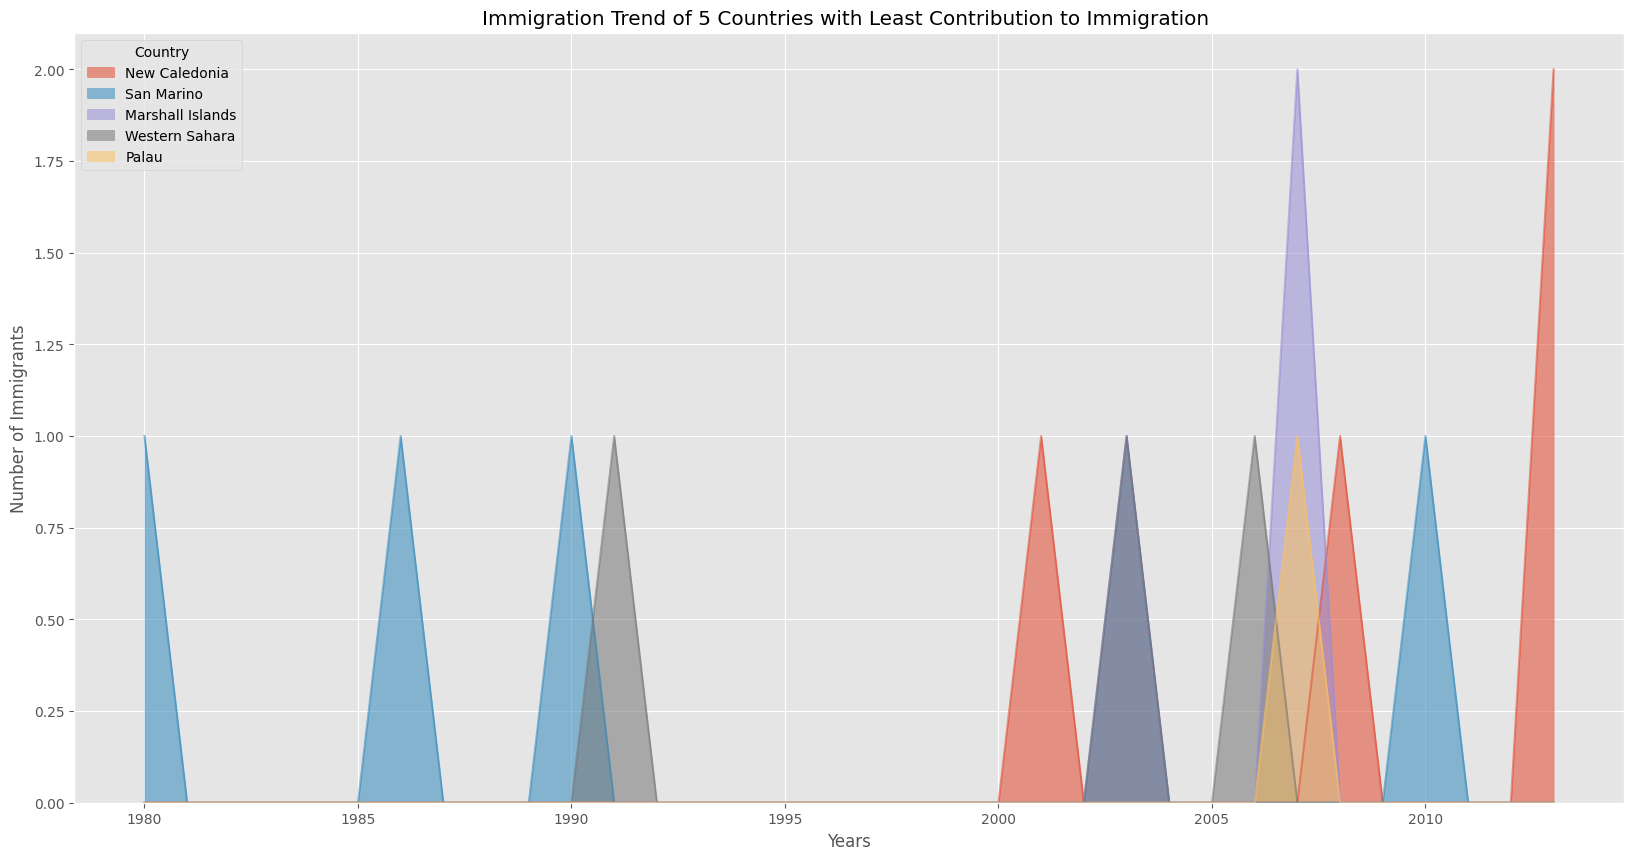

In [12]:
# using artist layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada
ax = df_least5.plot(kind='area', figsize=(20, 10), alpha= 0.55, stacked=False)

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration ')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [13]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [14]:
# using np.histogram 
count , bin_edges = np.histogram(df_can['2013']) # np.histogram returns 2 values
print('Frequency count:', count)
print(f'Bin ranges:{bin_edges}')

Frequency count: [178  11   1   2   0   0   0   0   1   2]
Bin ranges:[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Text(0, 0.5, 'Number of Countries')

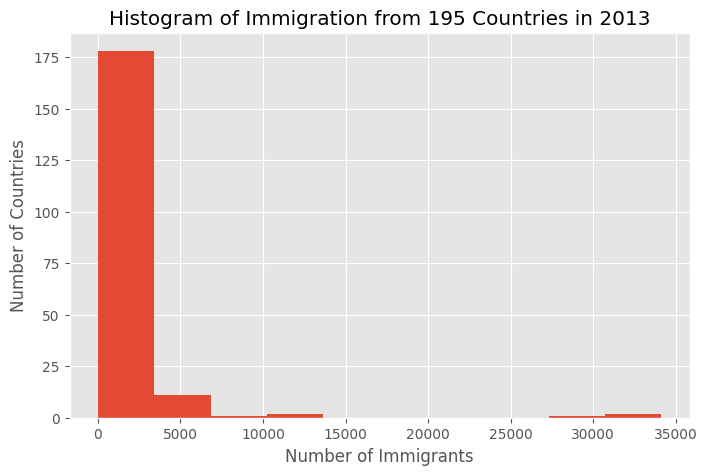

In [15]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:

Text(0.5, 0, 'Number of Immigrants')

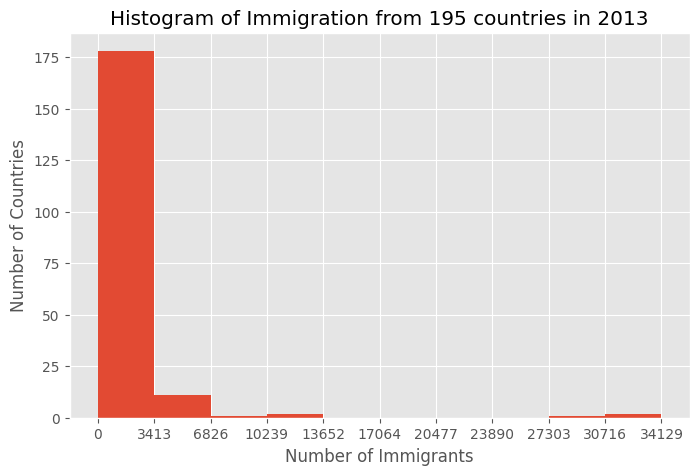

In [16]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label


In [17]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

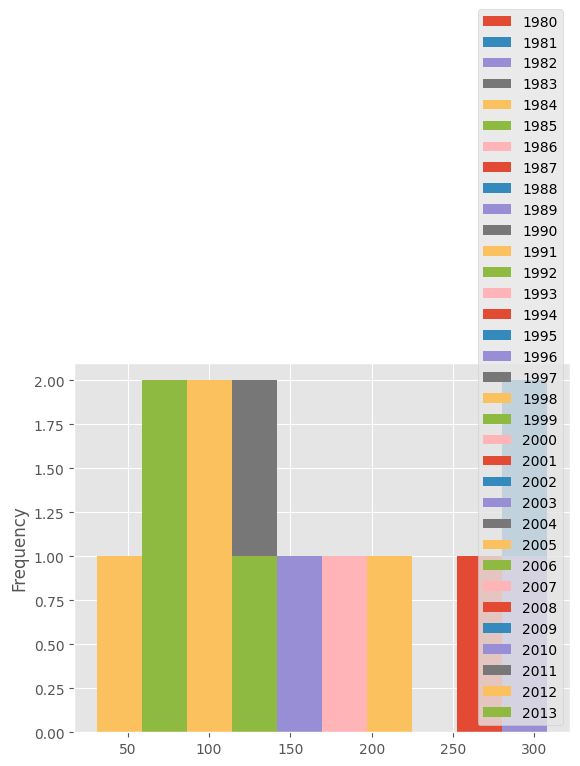

In [18]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [19]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


Text(0.5, 0, 'Number of Immigrants')

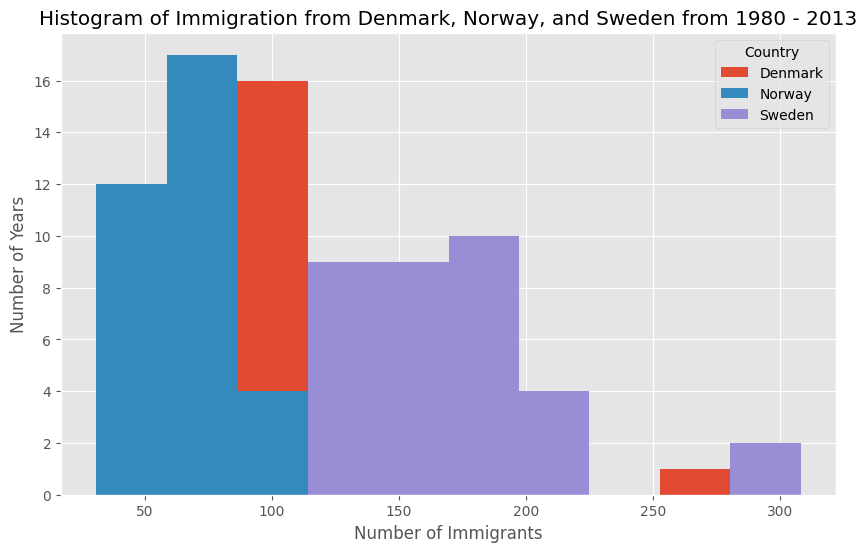

In [20]:
df_t.plot(kind='hist', figsize=(10, 6))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.

Text(0.5, 0, 'Number of Immigrants')

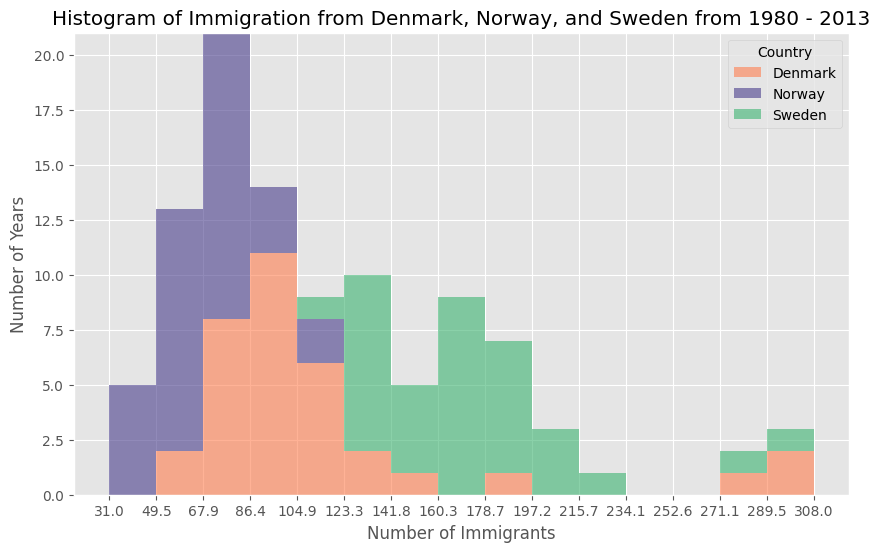

In [21]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind='hist', figsize=(10, 6), bins= 15, stacked=True, alpha=0.6, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')



Text(0.5, 0, 'Number of Immigrants')

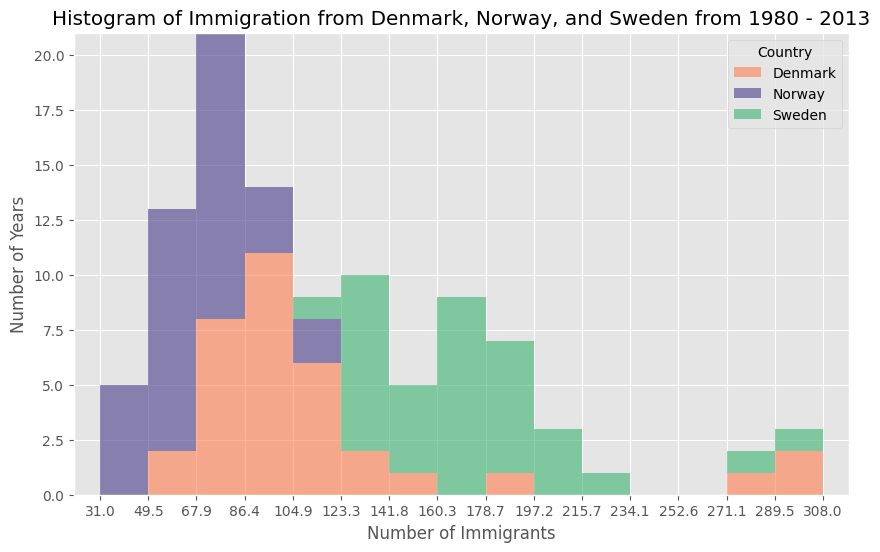

In [22]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes


df_t.plot(kind='hist', figsize=(10, 6), bins= 15, stacked=True,
        alpha=0.6, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen']
        , xlim=(xmin, xmax)
)
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

**Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.


In [23]:
df = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512


In [24]:
df_t = df.transpose()
df_t.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


Text(0.5, 0, 'Number of Immigrants')

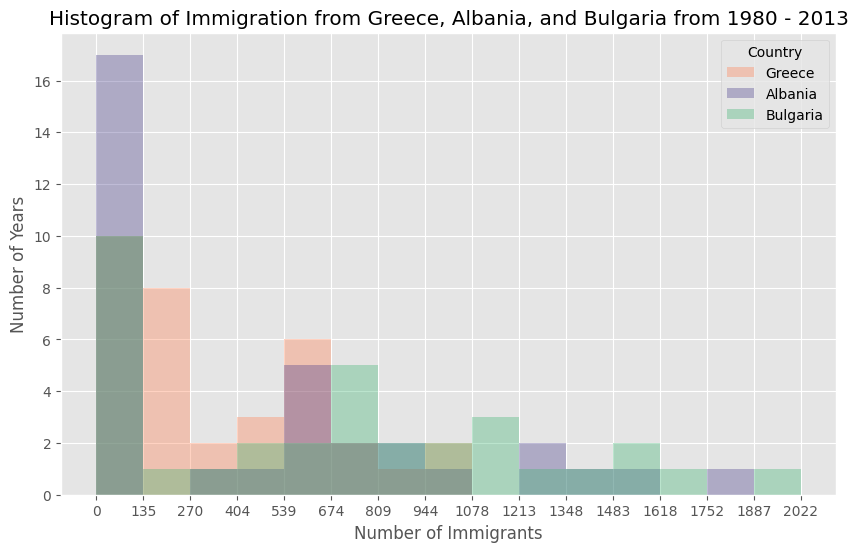

In [25]:
count, bin_edges = np.histogram(df_t, 15)
df_t.plot(kind='hist',
        alpha=0.35,
        bins=15,
        figsize=(10,6),
        xticks=bin_edges,
        color=['coral', 'darkslateblue', 'mediumseagreen']
        )
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

In [26]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

Text(0, 0.5, 'Number of immigrants')

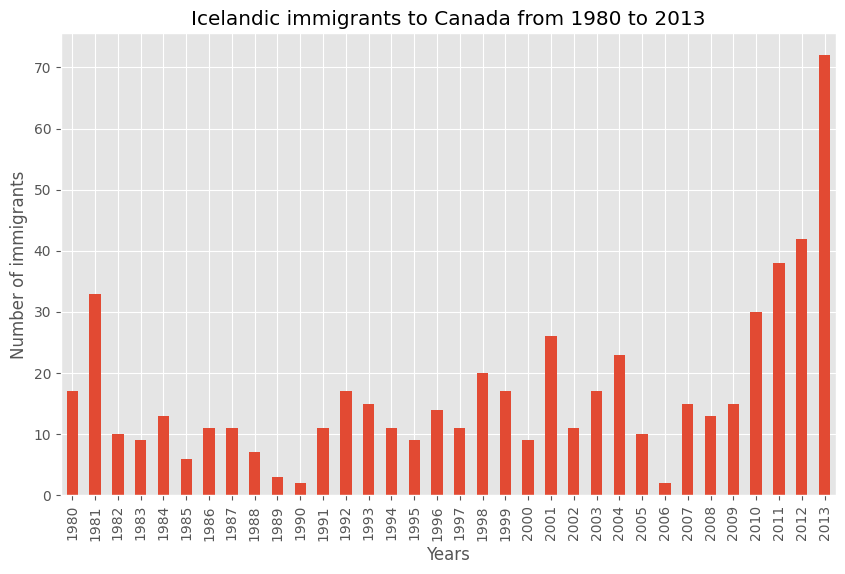

In [27]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

Text(28, 30, '2008 - 2011 Financial Crisis')

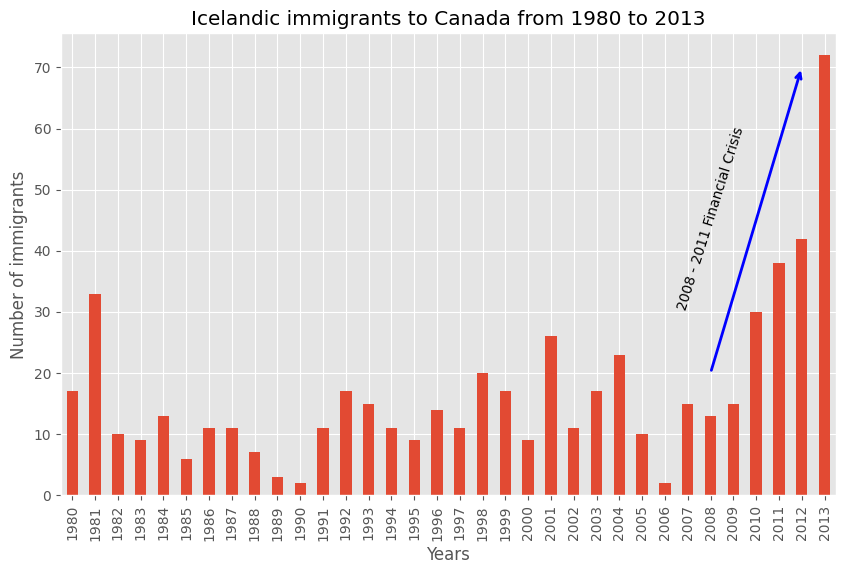

In [28]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

# annotate arrow
plt.annotate(
    '',
    xy=(32, 70),
    xytext=(28, 20),
    xycoords='data',
    arrowprops=dict(arrowstyle='->', connectionstyle= 'arc3', color='blue', lw=2)
)

# annotate text
plt.annotate(
    '2008 - 2011 Financial Crisis',
    xy=(28, 30),
    rotation=72.5,
    va='bottom',
    ha='center'
)

**Question:** Using the scripting later and the `df_can` dataset, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [29]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

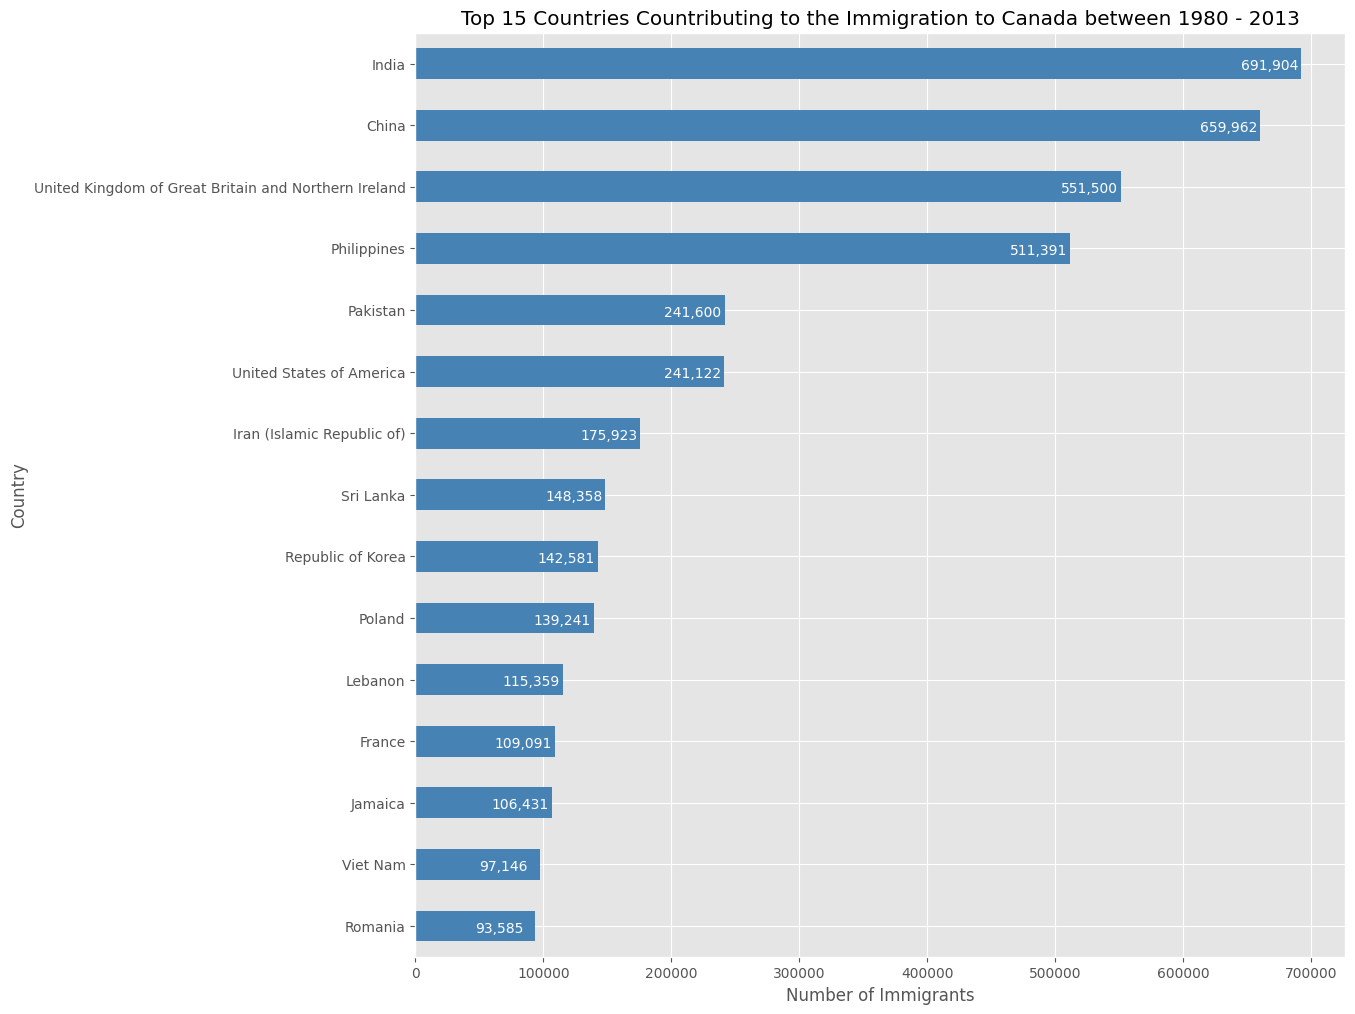

In [36]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.title('Top 15 Countries Countributing to the Immigration to Canada between 1980 - 2013')
plt.xlabel('Number of Immigrants')

# annotations
for index, value in enumerate(df_top15):
    label = format(int(value), ',')

    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')    